In [ ]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Conectar a la base de datos
conn = sqlite3.connect('data/northwind.db')

In [ ]:
# Definir la consulta SQL
query = """
SELECT 
    C.Region AS Region,
    P.ProductName AS Product,
    SUM(OD.Quantity * OD.UnitPrice * (1 - OD.Discount)) AS TotalSales
FROM 
    Orders O
JOIN 
    Order_Details OD ON O.OrderID = OD.OrderID
JOIN 
    Customers C ON O.CustomerID = C.CustomerID
JOIN 
    Products P ON OD.ProductID = P.ProductID
WHERE 
    C.Region IS NOT NULL
GROUP BY 
    C.Region, P.ProductName
ORDER BY 
    C.Region, TotalSales DESC;
"""

# Ejecutar la consulta y cargar los resultados en un DataFrame
df_sales_by_region = pd.read_sql_query(query, conn)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizar las ventas totales por producto en cada región
plt.figure(figsize=(14, 8))
sns.barplot(data=df_sales_by_region, x='Region', y='TotalSales', hue='Product')
plt.title('Total Sales of Products by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 2

In [ ]:
# Definir la consulta SQL para ventas por región y fecha
query_sales_trends = """
SELECT 
    C.Region AS Region,
    strftime('%Y-%m', O.OrderDate) AS OrderMonth,
    SUM(OD.Quantity * OD.UnitPrice * (1 - OD.Discount)) AS MonthlySales
FROM 
    Orders O
JOIN 
    Order_Details OD ON O.OrderID = OD.OrderID
JOIN 
    Customers C ON O.CustomerID = C.CustomerID
WHERE 
    C.Region IS NOT NULL
GROUP BY 
    C.Region, OrderMonth
ORDER BY 
    C.Region, OrderMonth;
"""

# Ejecutar la consulta y cargar los resultados en un DataFrame
df_sales_trends = pd.read_sql_query(query_sales_trends, conn)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar para visualizar solo las principales regiones de `df_total_sales`
top_regions = df_total_sales['Region'].head(3).values  # Ajusta el número de regiones según sea necesario
df_sales_trends_top = df_sales_trends[df_sales_trends['Region'].isin(top_regions)]

# Graficar la tendencia de ventas en las principales regiones
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_sales_trends_top, x='OrderMonth', y='MonthlySales', hue='Region', marker='o')
plt.title('Monthly Sales Trends in Top Revenue-Generating Regions')
plt.xlabel('Month')
plt.ylabel('Monthly Sales')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.tight_layout()
plt.show()

### 3

In [ ]:
# Consulta SQL para ingresos y costos por cliente
query_revenue_costs = """
SELECT 
    C.CustomerID AS Customer,
    C.CompanyName AS Company,
    SUM(OD.Quantity * OD.UnitPrice * (1 - OD.Discount)) AS TotalRevenue,
    SUM(OD.Quantity * P.UnitCost) AS TotalCost  -- UnitCost debe estar en la tabla Products
FROM 
    Orders O
JOIN 
    Order_Details OD ON O.OrderID = OD.OrderID
JOIN 
    Customers C ON O.CustomerID = C.CustomerID
JOIN 
    Products P ON OD.ProductID = P.ProductID
GROUP BY 
    C.CustomerID, C.CompanyName
ORDER BY 
    TotalRevenue DESC;
"""

# Ejecutar la consulta y cargar los resultados en un DataFrame
df_revenue_costs = pd.read_sql_query(query_revenue_costs, conn)

In [ ]:
df_revenue_costs['TotalProfit'] = df_revenue_costs['TotalRevenue'] - df_revenue_costs['TotalCost']

In [ ]:
top_customers = df_revenue_costs.head(10)

# Graficar ingresos, costos y ganancias por cliente
plt.figure(figsize=(14, 8))
sns.barplot(x='Company', y='TotalRevenue', data=top_customers, color='blue', label='Revenue')
sns.barplot(x='Company', y='TotalCost', data=top_customers, color='red', label='Cost')
sns.barplot(x='Company', y='TotalProfit', data=top_customers, color='green', label='Profit')
plt.title('Revenue, Cost, and Profit by Top Customers')
plt.xlabel('Customer Company')
plt.ylabel('Amount ($)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 4

In [ ]:
query_inventory = """
SELECT 
    CAT.CategoryName AS Category,
    SUM(P.UnitsInStock) AS TotalInventory
FROM 
    Products P
JOIN 
    Categories CAT ON P.CategoryID = CAT.CategoryID
GROUP BY 
    CAT.CategoryName
ORDER BY 
    TotalInventory DESC;
"""

# Ejecutar la consulta y cargar los resultados en un DataFrame
df_inventory = pd.read_sql_query(query_inventory, conn)

In [ ]:
# Consulta SQL para calcular la puntualidad de los proveedores
query_timeliness = """
SELECT 
    S.SupplierID AS Supplier,
    S.CompanyName AS SupplierName,
    AVG(JULIANDAY(O.ShippedDate) - JULIANDAY(O.OrderDate)) AS AvgDeliveryTime
FROM 
    Orders O
JOIN 
    Order_Details OD ON O.OrderID = OD.OrderID
JOIN 
    Products P ON OD.ProductID = P.ProductID
JOIN 
    Suppliers S ON P.SupplierID = S.SupplierID
WHERE 
    O.ShippedDate IS NOT NULL
GROUP BY 
    S.SupplierID, S.CompanyName
ORDER BY 
    AvgDeliveryTime ASC;
"""

# Ejecutar la consulta y cargar los resultados en un DataFrame
df_timeliness = pd.read_sql_query(query_timeliness, conn)

In [ ]:
query_quality = """
SELECT 
    S.SupplierID AS Supplier,
    S.CompanyName AS SupplierName,
    AVG(P.ProductQualityRating) AS AvgQualityRating
FROM 
    Products P
JOIN 
    Suppliers S ON P.SupplierID = S.SupplierID
GROUP BY 
    S.SupplierID, S.CompanyName
ORDER BY 
    AvgQualityRating DESC;
"""

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_inventory, x='Category', y='TotalInventory')
plt.title('Total Inventory by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Units in Stock')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualización de la puntualidad de proveedores
plt.figure(figsize=(10, 6))
sns.barplot(data=df_timeliness, x='SupplierName', y='AvgDeliveryTime', color='skyblue')
plt.title('Average Delivery Time by Supplier')
plt.xlabel('Supplier')
plt.ylabel('Average Delivery Time (days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 5

In [ ]:
query_sales_by_employee = """
SELECT 
    E.EmployeeID AS EmployeeID,
    E.FirstName || ' ' || E.LastName AS EmployeeName,
    SUM(OD.Quantity * OD.UnitPrice * (1 - OD.Discount)) AS TotalSales
FROM 
    Orders O
JOIN 
    Order_Details OD ON O.OrderID = OD.OrderID
JOIN 
    Employees E ON O.EmployeeID = E.EmployeeID
GROUP BY 
    E.EmployeeID, EmployeeName
ORDER BY 
    TotalSales DESC;
"""
df_sales_by_employee = pd.read_sql_query(query_sales_by_employee, conn)

In [13]:
query_order_handling = """
SELECT 
    E.EmployeeID AS EmployeeID,
    E.FirstName || ' ' || E.LastName AS EmployeeName,
    COUNT(O.OrderID) AS TotalOrdersHandled,
    AVG(JULIANDAY(O.ShippedDate) - JULIANDAY(O.OrderDate)) AS AvgProcessingTime
FROM 
    Orders O
JOIN 
    Employees E ON O.EmployeeID = E.EmployeeID
WHERE 
    O.ShippedDate IS NOT NULL
GROUP BY 
    E.EmployeeID, EmployeeName
ORDER BY 
    TotalOrdersHandled DESC;
"""

# Ejecutar la consulta y cargar los resultados en un DataFrame
df_order_handling = pd.read_sql_query(query_order_handling, conn)

In [14]:
query_delivery_timeliness = """
SELECT 
    E.EmployeeID AS EmployeeID,
    E.FirstName || ' ' || E.LastName AS EmployeeName,
    AVG(JULIANDAY(O.ShippedDate) - JULIANDAY(O.RequiredDate)) AS AvgTimeliness
FROM 
    Orders O
JOIN 
    Employees E ON O.EmployeeID = E.EmployeeID
WHERE 
    O.ShippedDate IS NOT NULL
GROUP BY 
    E.EmployeeID, EmployeeName
ORDER BY 
    AvgTimeliness ASC;
"""

# Ejecutar la consulta y cargar los resultados en un DataFrame
df_delivery_timeliness = pd.read_sql_query(query_delivery_timeliness, conn)

In [ ]:
# Visualizar ventas por empleado
plt.figure(figsize=(10, 6))
sns.barplot(data=df_sales_by_employee, x='EmployeeName', y='TotalSales', color='skyblue')
plt.title('Total Sales by Employee')
plt.xlabel('Employee')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



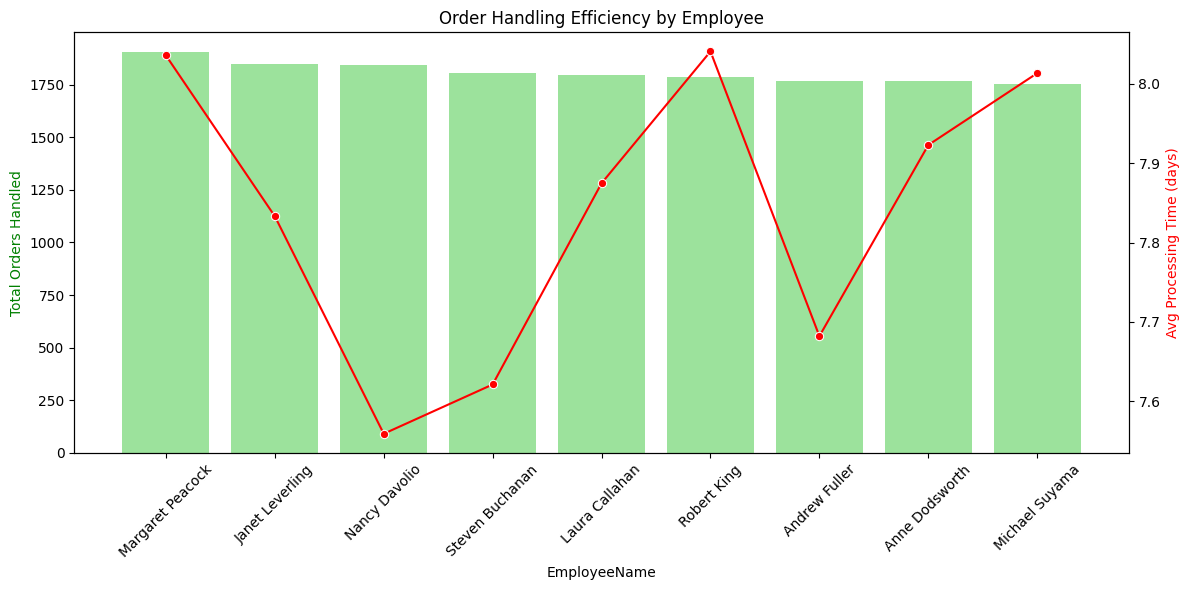

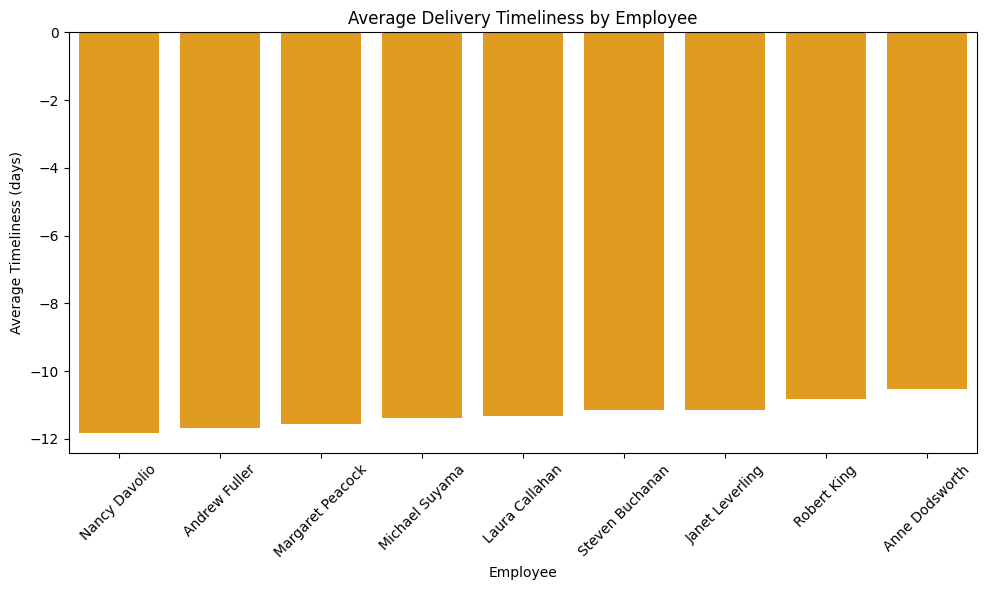

In [15]:
# Visualizar eficiencia en el manejo de pedidos (Total Orders Handled y Avg Processing Time)
fig, ax1 = plt.subplots(figsize=(12, 6))
sns.barplot(data=df_order_handling, x='EmployeeName', y='TotalOrdersHandled', color='lightgreen', ax=ax1)
ax1.set_ylabel('Total Orders Handled', color='green')
ax1.set_title('Order Handling Efficiency by Employee')
plt.xticks(rotation=45)

ax2 = ax1.twinx()
sns.lineplot(data=df_order_handling, x='EmployeeName', y='AvgProcessingTime', color='red', marker='o', ax=ax2)
ax2.set_ylabel('Avg Processing Time (days)', color='red')
plt.tight_layout()
plt.show()

# Visualizar puntualidad en la entrega de productos
plt.figure(figsize=(10, 6))
sns.barplot(data=df_delivery_timeliness, x='EmployeeName', y='AvgTimeliness', color='orange')
plt.title('Average Delivery Timeliness by Employee')
plt.xlabel('Employee')
plt.ylabel('Average Timeliness (days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()